In [17]:
import yfinance as yf

# Mengunduh data harga saham 
data = yf.download('INDY', start='2022-01-01', end='2022-12-01')
data.to_csv('INDY.csv')


[*********************100%%**********************]  1 of 1 completed


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Membaca data saham dari file CSV
#jika menggunakan data selain saham yahoo finance, bisa ubah disini
data = pd.read_csv('INDY.csv')
data = data['Close'].values #cek pada masing2 data, karena terkadang atribut close = CLOSE/Close

# Normalisasi data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Fungsi untuk membagi dataset menjadi input dan output
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i+look_back)])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

# Membagi dataset menjadi data latih dan data uji
train_size = int(len(data) * 0.67)
train_data, test_data = data[0:train_size], data[train_size:]

look_back = 5
train_X, train_y = create_dataset(train_data, look_back)
test_X, test_y = create_dataset(test_data, look_back)

# Reshape data agar sesuai dengan input LSTM
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Membangun model LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)

# Melakukan prediksi pada data uji
predicted = model.predict(test_X)
predicted = scaler.inverse_transform(predicted)
test_y = scaler.inverse_transform(test_y)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, predicted)
print(f'Mean Absolute Error (MAE): {mae}')



Epoch 1/100
156/156 - 3s - loss: 0.1455 - 3s/epoch - 22ms/step
Epoch 2/100
156/156 - 1s - loss: 0.0435 - 505ms/epoch - 3ms/step
Epoch 3/100
156/156 - 1s - loss: 0.0218 - 507ms/epoch - 3ms/step
Epoch 4/100
156/156 - 0s - loss: 0.0164 - 480ms/epoch - 3ms/step
Epoch 5/100
156/156 - 1s - loss: 0.0126 - 619ms/epoch - 4ms/step
Epoch 6/100
156/156 - 1s - loss: 0.0102 - 588ms/epoch - 4ms/step
Epoch 7/100
156/156 - 1s - loss: 0.0085 - 567ms/epoch - 4ms/step
Epoch 8/100
156/156 - 1s - loss: 0.0076 - 578ms/epoch - 4ms/step
Epoch 9/100
156/156 - 1s - loss: 0.0069 - 584ms/epoch - 4ms/step
Epoch 10/100
156/156 - 0s - loss: 0.0068 - 449ms/epoch - 3ms/step
Epoch 11/100
156/156 - 1s - loss: 0.0066 - 526ms/epoch - 3ms/step
Epoch 12/100
156/156 - 0s - loss: 0.0064 - 498ms/epoch - 3ms/step
Epoch 13/100
156/156 - 1s - loss: 0.0061 - 575ms/epoch - 4ms/step
Epoch 14/100
156/156 - 1s - loss: 0.0060 - 537ms/epoch - 3ms/step
Epoch 15/100
156/156 - 1s - loss: 0.0060 - 586ms/epoch - 4ms/step
Epoch 16/100
156/156 

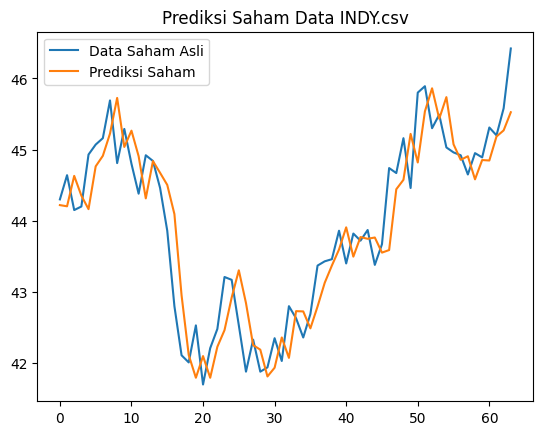

In [19]:
# Plot hasil prediksi
plt.plot(test_y, label='Data Saham Asli')
plt.plot(predicted, label='Prediksi Saham')
plt.legend()
plt.title('Prediksi Saham Data INDY.csv') #sesuaikan dengan dataset
plt.show()